In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [246]:
heart_data = pd.read_csv('/content/data.csv')

In [247]:
 heart_data= heart_data.drop(['oldpeak','slp','thall','exng','caa'],axis=1)
new_column_names = {
    'sex': 'Gender',
    'cp': 'Chest_Pain',

    'chol':'Cholestoral',
    'fbs':'Blood_Sugar',
    'restecg':'ECG',
    'thalachh':'Heart_Rate',
    'age':'Age'


}


heart_data.rename(columns=new_column_names, inplace=True)

In [248]:

new_column_names = {
    'trtbps': 'Blood_Pressure',



}


heart_data.rename(columns=new_column_names, inplace=True)

In [249]:
heart_data.head()

,Age,Gender,Chest_Pain,Blood_Pressure,Cholestoral,Blood_Sugar,ECG,Heart_Rate,output
0,63,1,3,145,233,1,0,150,1
1,37,1,2,130,250,0,1,187,1
2,41,0,1,130,204,0,0,172,1
3,56,1,1,120,236,0,1,178,1
4,57,0,0,120,354,0,1,163,1


In [250]:
heart_data.shape

(303, 9)

In [251]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             303 non-null    int64
 1   Gender          303 non-null    int64
 2   Chest_Pain      303 non-null    int64
 3   Blood_Pressure  303 non-null    int64
 4   Cholestoral     303 non-null    int64
 5   Blood_Sugar     303 non-null    int64
 6   ECG             303 non-null    int64
 7   Heart_Rate      303 non-null    int64
 8   output          303 non-null    int64
dtypes: int64(9)
memory usage: 21.4 KB


In [252]:
#heart_data['thall'] = pd.to_numeric(heart_data['thall'])

In [253]:
heart_data.isnull().sum()

Age               0
Gender            0
Chest_Pain        0
Blood_Pressure    0
Cholestoral       0
Blood_Sugar       0
ECG               0
Heart_Rate        0
output            0
dtype: int64

In [254]:
heart_data.describe()

,Age,Gender,Chest_Pain,Blood_Pressure,Cholestoral,Blood_Sugar,ECG,Heart_Rate,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000


In [255]:
heart_data.head()

,Age,Gender,Chest_Pain,Blood_Pressure,Cholestoral,Blood_Sugar,ECG,Heart_Rate,output
0,63,1,3,145,233,1,0,150,1
1,37,1,2,130,250,0,1,187,1
2,41,0,1,130,204,0,0,172,1
3,56,1,1,120,236,0,1,178,1
4,57,0,0,120,354,0,1,163,1


In [256]:
heart_data.corr()

,Age,Gender,Chest_Pain,Blood_Pressure,Cholestoral,Blood_Sugar,ECG,Heart_Rate,output
Age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,-0.225439
Gender,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,-0.280937
Chest_Pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,0.433798
Blood_Pressure,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,-0.144931
Cholestoral,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,-0.085239
Blood_Sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,-0.028046
ECG,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,0.137230
Heart_Rate,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,0.421741
output,-0.225439,-0.280937,0.433798,-0.144931,-0.085239,-0.028046,0.137230,0.421741,1.000000


<Axes: >

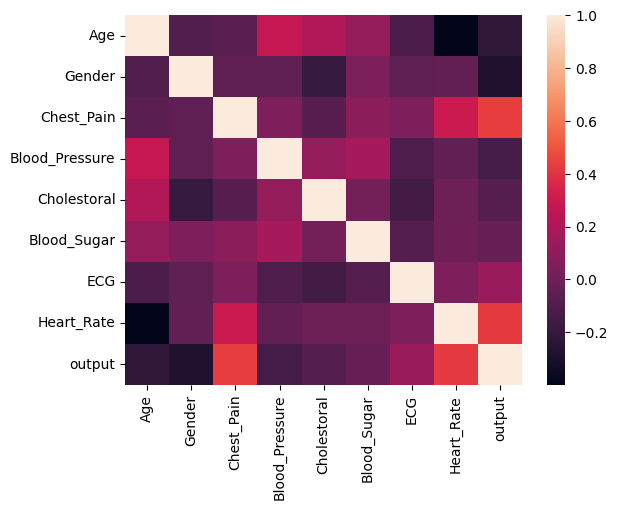

In [257]:
sns.heatmap(heart_data.corr())

<Axes: title={'center': 'Age of Patients'}, xlabel='Age', ylabel='count'>

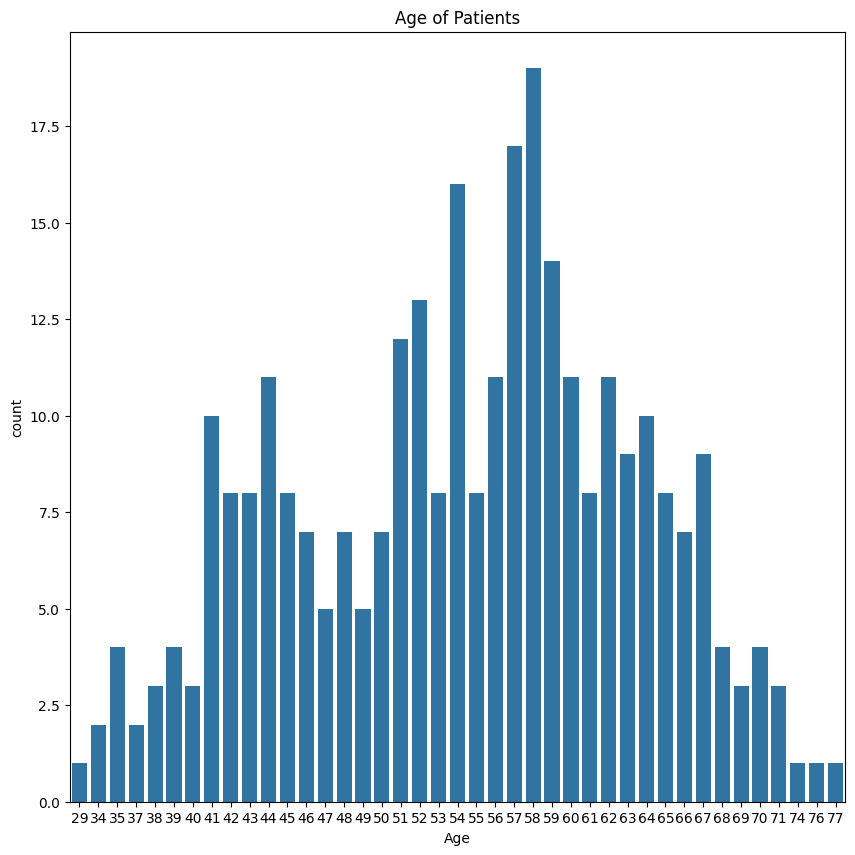

In [258]:
plt.figure(figsize=(10, 10))
plt.title("Age of Patients")
plt.xlabel("Age")
sns.countplot(x='Age',data=heart_data)

In [259]:
heart_data['Gender'].value_counts()

Gender
1    207
0     96
Name: count, dtype: int64

<Axes: title={'center': 'Sex of Patients,0=Female and 1=Male'}, xlabel='Gender', ylabel='count'>

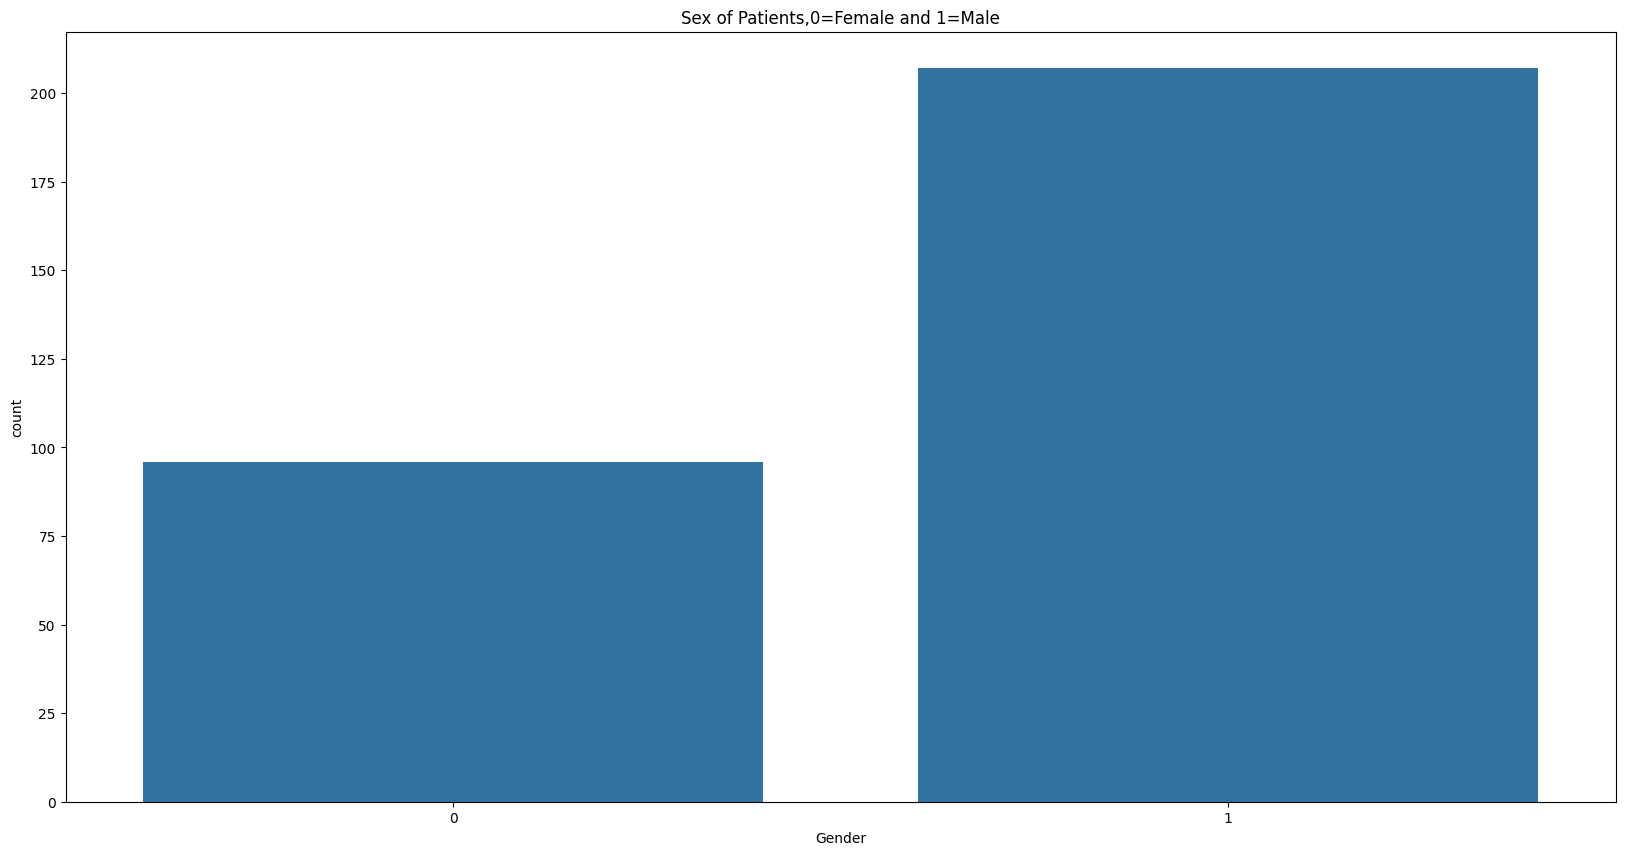

In [260]:
plt.figure(figsize=(20, 10))
plt.title("Sex of Patients,0=Female and 1=Male")

sns.countplot(x='Gender',data=heart_data)

In [261]:
cp_data= heart_data['Chest_Pain'].value_counts()
cp_data

Chest_Pain
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [262]:
ecg_data= heart_data['ECG'].value_counts()
ecg_data

ECG
1    152
0    147
2      4
Name: count, dtype: int64

In [263]:
X = heart_data.drop(columns = 'output', axis = 1)
Y = heart_data['output']

In [264]:
print(X)

     Age  Gender  Chest_Pain  Blood_Pressure  Cholestoral  Blood_Sugar  ECG  \
0     63       1           3             145          233            1    0   
1     37       1           2             130          250            0    1   
2     41       0           1             130          204            0    0   
3     56       1           1             120          236            0    1   
4     57       0           0             120          354            0    1   
..   ...     ...         ...             ...          ...          ...  ...   
298   57       0           0             140          241            0    1   
299   45       1           3             110          264            0    1   
300   68       1           0             144          193            1    1   
301   57       1           0             130          131            0    1   
302   57       0           1             130          236            0    0   

     Heart_Rate  
0           150  
1           187

In [265]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64


In [266]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2 )

In [267]:
print(X.shape, X_train.shape, X_test.shape)

(303, 8) (242, 8) (61, 8)


In [268]:
model = LogisticRegression()

In [269]:
model.fit(X_train, Y_train)

LogisticRegression()

In [270]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [271]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.8140495867768595


In [272]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [273]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.7377049180327869


In [274]:
for column in X.columns:
  print(column)

Age
Gender
Chest_Pain
Blood_Pressure
Cholestoral
Blood_Sugar
ECG
Heart_Rate


In [275]:
error_rate= []
for i in range(1,40):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred= knn.predict(X_test)
    error_rate.append(np.mean(pred != Y_test))

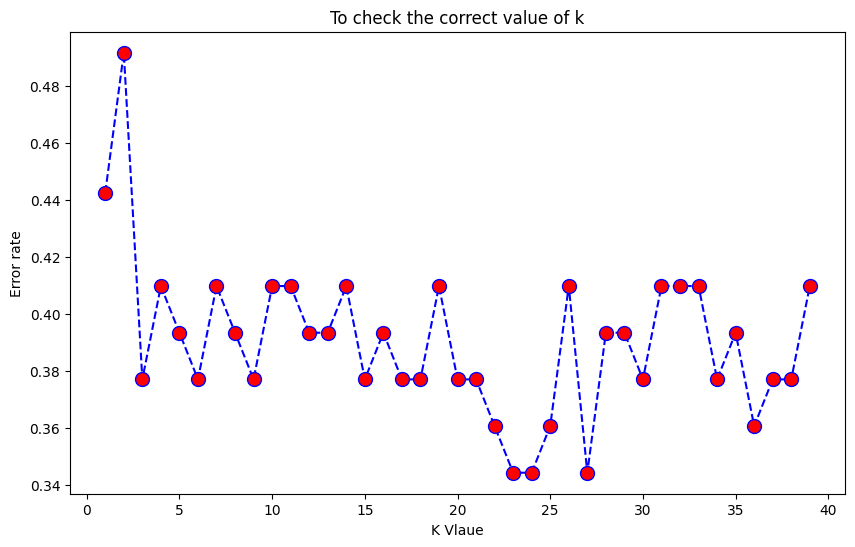

In [276]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.xlabel('K Vlaue')
plt.ylabel('Error rate')
plt.title('To check the correct value of k')
plt.show()

In [277]:
knn= KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,Y_train)
ypred= knn.predict(X_test)

In [278]:
knn_acc_score = accuracy_score(Y_test, ypred)

In [279]:
print(knn_acc_score)

0.6065573770491803


In [280]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6229508196721312


In [281]:
input_data = (63,1,3,145,233,1,0,150)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print(prediction)

if (prediction[0] == 0):
  print('The person doesnot have heart disease')
else:
  print('The person has heart disease')

[1]
The person has heart disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [282]:
import pickle

In [283]:
filename = 'heart_disease_model.sav'
pickle.dump(model,open(filename, 'wb'))